In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The first few data frames and graphs are for our initial analysis of splitting the data into 1.5 seconds (1500 milliseconds). In doing so we realized the math after doing the FFT's was not as helpful to the experiment and paper as we would have liked on a case-by-case basis. There would have needed to been more supplemental math involved in determining the average frequencies detected by each electrode that attaches to a part of the Monkey brain. As a result, our group and Cooper decided to just trim the data to 1000 milliseconds each, and then continue the visualization. The code that follows after our change in approach begins with *******, and below that marks our code for the project. Everything above refers to either the work we collaborated with Cooper, or our 1.5 second data visualization.

In [5]:
first_seconds = pd.read_excel("C:\\Users\\cberg\\Documents\\finalprojectbiol419\\1.5secondsstartexperiment.xlsx")
first_seconds

# for 1.5 seconds of data

ECoG_time  ECoG_ch1  ECoG_ch2  ECoG_ch3  ECoG_ch4  ECoG_ch5  ECoG_ch6  \
0         0.000       192         4      -364      -454         1      -366   
1         0.001       205       -35      -328      -415        -7      -379   
2         0.002       230       -73      -346      -385       -22      -368   
3         0.003       242       -97      -332      -348       -59      -359   
4         0.004       286       -75      -321      -337       -94      -342   
5         0.005       314       -74      -338      -374      -110      -315   
6         0.006       361       -51      -376      -370      -138      -297   
7         0.007       389       -68      -374      -357      -166      -277   
8         0.008       405       -61      -344      -341      -184      -239   
9         0.009       426       -67      -275      -300      -184      -187   
10        0.010       445       -97      -256      -283      -160       -97   
11        0.011       477      -106      -236      -270      -129       -83   
12        0.012       486      -102      -233      -276      -107       -84   
13        0.013       492      -118      -244      -270       -88       -49   
14        0.014       495      -174      -189      -222       -92       -18   
15        0.015       483      -246      -153      -184       -98       -38   
16        0.016       457      -246      -150      -136       -84       -20   
17        0.017       427      -236      -183      -118       -77       -20   
18        0.018       400      -217      -225      -131       -88       -51   
19        0.019       368      -205      -250      -131       -93      -104   
20        0.020       344      -198      -224       -76      -104      -171   
21        0.021       329      -186      -205       -18       -98      -206   
22        0.022       315      -167      -168        52       -95      -210   
23        0.023       289      -174      -150       110       -95      -236   
24        0.024       253      -200      -196       162      -126      -231   
25        0.025       221      -229      -238       190      -144      -206   
26        0.026       182      -223      -230       222      -159      -151   
27        0.027       147      -208      -234       240      -160      -144   
28        0.028        99      -185      -187       268      -172      -139   
29        0.029        49      -159      -125       288      -184      -114   
...         ...       ...       ...       ...       ...       ...       ...   
1471      1.471        -9        11      -143        94       -62        78   
1472      1.472        31        14       -86       128       -36       109   
1473      1.473        57        12       -40       144         8       137   
1474      1.474       103        13         6       152        20       168   
1475      1.475       134        28        38       125        41       162   
1476      1.476       142        41        61       112        30       137   
1477      1.477       175        60        81        68        65       134   
1478      1.478       196        58        50        -5        54       110   
1479      1.479       220        68       -10       -58        57        93   
1480      1.480       226        90       -23       -43        77       113   
1481      1.481       234       111       -23       -21        69       116   
1482      1.482       225       111       -34        -5        47       117   
1483      1.483       245       104       -19        46        16       126   
1484      1.484       243        75       -24        86       -25       138   
1485      1.485       233        51         9       141       -69       143   
1486      1.486       231        26        21       179       -90       143   
1487      1.487       212         7        42       179       -99       142   
1488      1.488       226        24        61       202       -87       131   
1489      1.489       217        32        29       197 

In [6]:
pre_anesthetics = pd.read_excel("C:\\Users\\cberg\\Documents\\finalprojectbiol419\\1.5secpreanesthetics.xlsx")
pre_anesthetics

629.5  -238  -247  -155  -124   78  -25  -174  488  -112  ...    -132  \
0     629.501  -241  -251  -204  -141  106  -13  -150  419  -115  ...    -118   
1     629.502  -234  -225  -234  -170  115   20  -126  390  -114  ...    -130   
2     629.503  -228  -197  -242  -178  121   22  -110  339  -104  ...    -145   
3     629.504  -207  -150  -234  -177  132   25   -79  259  -104  ...    -146   
4     629.505  -196  -128  -232  -169  125   18   -96  205   -98  ...    -138   
5     629.506  -188  -127  -220  -159  127   35   -98   88   -72  ...    -135   
6     629.507  -151  -115  -162  -140  113   -6  -124   -3   -83  ...    -139   
7     629.508  -124   -92  -160  -124  102  -20  -115  -11   -73  ...    -129   
8     629.509   -80   -84  -155   -89  120   -6   -92   -7   -79  ...    -115   
9     629.510   -43   -76  -152   -53  111  -30   -71  -16   -80  ...    -106   
10    629.511   -24   -51  -191   -35   76  -61   -66    6   -98  ...     -91   
11    629.512     1   -45  -189   -14   81  -68   -72   10  -103  ...     -86   
12    629.513    24   -24  -166   -30   80 -103   -92   53   -98  ...     -82   
13    629.514    45    -1  -117   -63   50 -174  -138   65   -75  ...     -76   
14    629.515    48     4   -71   -77   56 -215  -170   24   -51  ...     -65   
15    629.516    74    38     0   -60   22 -248  -235   -3   -21  ...     -43   
16    629.517    54    45    19   -76  -11 -247  -281  -44    -9  ...     -15   
17    629.518    75    75    -3   -92  -58 -247  -302  -79     0  ...      -7   
18    629.519    92   110   -34  -120 -123 -231  -303  -83    19  ...     -12   
19    629.520   108   138   -58  -133 -167 -206  -264  -47    41  ...      -3   
20    629.521   111   133   -66  -133 -181 -178  -254  -11    68  ...     -11   
21    629.522   108   116   -56  -160 -192 -133  -231   52   116  ...      -7   
22    629.523   108   114   -42  -184 -184  -69  -190   93   134  ...      -3   
23    629.524   107   108   -52  -187 -188  -68  -169  146   152  ...      10   
24    629.525   118   100   -51  -204 -184  -88  -145  145   159  ...       6   
25    629.526   129    92   -74  -232 -178 -109  -148  138   172  ...      -2   
26    629.527   157    80   -61  -282 -160 -102  -165  159   139  ...      -9   
27    629.528   175    69   -63  -352 -141  -92  -166  172   108  ...     -24   
28    629.529   215    58   -64  -394 -113  -78  -155  198    87  ...     -39   
29    629.530   232    66   -37  -408 -109  -83  -171  220    76  ...     -35   
...       ...   ...   ...   ...   ...  ...  ...   ...  ...   ...  ...     ...   
1470  630.971     8   -74  -354  -301 -337 -323  -329 -574    -4  ...    -169   
1471  630.972    45   -57  -320  -329 -339 -306  -312 -563    21  ...    -122   
1472  630.973    67   -33  -307  -353 -327 -258  -272 -600    76  ...     -72   
1473  630.974    88   -37  -312  -331 -284 -284  -235 -633   115  ...      -9   
1474  630.975   102   -40  -293  -284 -262 -313  -189 -635   141  ...      22   
1475  630.976   115   -64  -302  -267 -243 -336  -183 -629   162  ...      62   
1476  630.977   137   -93  -335  -222 -207 -344  -188 -622   166  ...      83   
1477  630.978   166  -118  -351  -182 -169 -293  -173 -596   185  ...     113   
1478  630.979   159  -155  -307  -153 -162 -280  -174 -566   206  ...     146   
1479  630.980   173  -192  -258  -113 -148 -273  -162 -503   234  ...     153   
1480  630.981   161  -225  -234   -60 -141 -273  -172 -471   237  ...     154   
1481  630.982   166  -231  -225   -55 -160 -290  -202 -411   227  ...     144   
1482  630.983   169  -227  -226   -52 -148 -286  -219 -410   195  ...     130   
1483  630.984   176  -227  -219   -22 -150 -260  -264 -404   145  ...     113   
1484  630.985   167  -218  -205   -36 -148 -265  -278 -403    98  ...     100   
1485  630.986   164  -203  -150   -65 -128 -229  -271 -409    41  ...      95   
1486  630.987   156  -190  -136  -133 -127 -266  -279 -407   -34  ...      89   
1487  630.988   121  -188  -101  -201 -

In [7]:
post_anesthetics = pd.read_excel("C:\\Users\\cberg\\Documents\\finalprojectbiol419\\1.5secpostanesthetics.xlsx")
post_anesthetics
# 1.5 seconds after anesthestized

631  -469  -36  -107  -194  -238  -446   14  -558  -615  ...   -48  \
0     631.001  -497  -33  -120  -197  -241  -423   44  -538  -595  ...   -62   
1     631.002  -513  -14  -129  -201  -233  -417   66  -471  -543  ...   -59   
2     631.003  -564    4  -171  -213  -225  -433   90  -430  -488  ...   -50   
3     631.004  -609   26  -188  -245  -239  -469  104  -409  -409  ...   -54   
4     631.005  -608   40  -201  -270  -239  -487  141  -340  -324  ...   -65   
5     631.006  -606   27  -241  -258  -250  -498  159  -313  -239  ...   -82   
6     631.007  -606   20  -272  -255  -266  -485  175  -306  -162  ...  -106   
7     631.008  -585   37  -274  -255  -272  -466  184  -311   -80  ...  -107   
8     631.009  -568   59  -256  -292  -286  -447  220  -325   -17  ...  -109   
9     631.010  -570   71  -244  -380  -266  -414  232  -318    62  ...  -118   
10    631.011  -578   57  -236  -436  -268  -350  254  -308   100  ...  -101   
11    631.012  -555   51  -192  -491  -263  -305  269  -284   145  ...   -93   
12    631.013  -544   40  -172  -515  -251  -288  254  -241   189  ...   -81   
13    631.014  -521   20  -209  -526  -223  -279  200  -197   222  ...   -77   
14    631.015  -459   31  -230  -497  -164  -226  162  -159   259  ...   -72   
15    631.016  -394   27  -229  -440  -123  -172   86  -131   289  ...   -79   
16    631.017  -342   38  -211  -436  -111  -159   -6   -76   333  ...   -87   
17    631.018  -299   29  -181  -459  -107  -141  -68    -7   370  ...   -86   
18    631.019  -258   21  -159  -492  -110  -105 -122    27   401  ...   -90   
19    631.020  -226   23  -136  -453  -124   -48 -135    52   412  ...   -77   
20    631.021  -206    9  -107  -386  -131   -23 -163    83   381  ...   -60   
21    631.022  -181    4   -91  -345  -128   -11 -187    12   338  ...   -56   
22    631.023  -160    2   -95  -292  -124    25 -254   -71   288  ...   -29   
23    631.024  -131   20  -114  -279   -83    50 -260  -114   269  ...   -15   
24    631.025   -99   27  -135  -276   -82    62 -294  -212   240  ...    13   
25    631.026   -90   16  -167  -304   -57    63 -278  -306   198  ...    38   
26    631.027   -59   36  -185  -301   -28    61 -260  -323   164  ...    59   
27    631.028   -46   52  -217  -299   -18    80 -267  -364   125  ...    70   
28    631.029   -24   83  -238  -276   -41    84 -290  -379    91  ...    86   
29    631.030     5  102  -253  -263   -84    89 -264  -416    64  ...    63   
...       ...   ...  ...   ...   ...   ...   ...  ...   ...   ...  ...   ...   
1470  632.471   482  148  -332   -47   -46   -16   80  -585   165  ...    23   
1471  632.472   477  158  -387   -64   -42    14   63  -637   132  ...    29   
1472  632.473   476  165  -406   -62   -39    44   46  -693   103  ...    36   
1473  632.474   473  173  -430   -45   -27    72   58  -763    74  ...    46   
1474  632.475   458  190  -408   -28   -41   113   79  -837    30  ...    40   
1475  632.476   434  215  -394    -2   -60   164   87  -854   -11  ...    57   
1476  632.477   429  254  -413    38   -78   187  107  -852     4  ...    61   
1477  632.478   431  283  -418    67   -84   184  129  -854     1  ...    62   
1478  632.479   428  313  -425    80   -91   190  119  -861     4  ...    70   
1479  632.480   412  349  -402    56  -135   180  118  -888    13  ...    81   
1480  632.481   374  348  -375    58  -185   172  132  -944    -3  ...    72   
1481  632.482   352  352  -371    55  -186   178  151 -1020    16  ...    62   
1482  632.483   338  314  -341    51  -217   141  115 -1043    17  ...    56   
1483  632.484   314  279  -278    36  -232   103   99 -1026   -30  ...    42   
1484  632.485   328  288  -217    20  -222    83   85  -992   -43  ...    45   
1485  632.486   322  345  -199   -18  -192    89   83  -934   -34  ...    39   
1486  632.487   329  383  -219   -52  -178    93   83  -927    -3  ...    39   
1487  632.488   333  387  -219   -81  -177    89   75  -930    28  ...    23   
1488  632.

In [8]:
last_seconds = pd.read_excel("C:\\Users\\cberg\\Documents\\finalprojectbiol419\\1.5secondendexperiment.xlsx")
last_seconds

1047.074  -89  -382  -350  -276  -290  -72  -493  -312  -87  ...   -391  \
0     1047.075  -26  -350  -436  -263  -248 -143  -548  -344 -157  ...   -389   
1     1047.076   31  -323  -460  -233  -193 -179  -586  -419 -238  ...   -403   
2     1047.077   55  -310  -464  -188  -165 -168  -618  -474 -326  ...   -409   
3     1047.078   52  -306  -457  -156  -153 -169  -625  -501 -412  ...   -404   
4     1047.079   51  -297  -429  -122  -159 -170  -591  -466 -470  ...   -376   
5     1047.080   39  -327  -409  -107  -157 -176  -562  -474 -486  ...   -350   
6     1047.081   19  -373  -386  -108  -154 -198  -523  -464 -489  ...   -320   
7     1047.082    6  -413  -345  -113  -208 -174  -491  -436 -461  ...   -297   
8     1047.083   -3  -453  -345  -144  -273 -125  -481  -414 -442  ...   -291   
9     1047.084  -20  -498  -365  -184  -295  -64  -487  -375 -422  ...   -298   
10    1047.085  -37  -541  -358  -196  -301  -23  -514  -354 -384  ...   -328   
11    1047.086  -69  -584  -352  -222  -310    0  -536  -314 -351  ...   -359   
12    1047.087  -81  -599  -324  -240  -298   61  -541  -288 -316  ...   -377   
13    1047.088  -90  -588  -315  -263  -296  138  -551  -327 -270  ...   -400   
14    1047.089  -84  -585  -316  -272  -279  150  -553  -360 -226  ...   -439   
15    1047.090  -73  -534  -323  -253  -244  150  -563  -372 -160  ...   -470   
16    1047.091  -70  -474  -354  -240  -244  145  -572  -350 -104  ...   -504   
17    1047.092  -59  -413  -416  -242  -246   52  -614  -321  -64  ...   -512   
18    1047.093  -48  -388  -471  -255  -244  -81  -626  -238  -29  ...   -531   
19    1047.094  -27  -350  -460  -284  -228 -154  -629  -161   -1  ...   -550   
20    1047.095  -13  -326  -445  -287  -220 -180  -611   -91   36  ...   -574   
21    1047.096   22  -309  -441  -296  -199 -202  -582   -21   42  ...   -577   
22    1047.097   40  -317  -433  -341  -227 -244  -557    -8   14  ...   -583   
23    1047.098   45  -307  -425  -377  -239 -286  -541   -24  -52  ...   -578   
24    1047.099   52  -321  -419  -388  -213 -308  -544  -105 -108  ...   -554   
25    1047.100   23  -323  -405  -412  -175 -321  -548  -204 -186  ...   -546   
26    1047.101  -16  -337  -446  -400  -136 -342  -559  -293 -257  ...   -525   
27    1047.102  -26  -326  -520  -356  -110 -382  -557  -296 -305  ...   -496   
28    1047.103  -43  -328  -557  -334  -111 -364  -546  -265 -335  ...   -446   
29    1047.104  -27  -334  -589  -339  -138 -297  -548  -291 -354  ...   -419   
...        ...  ...   ...   ...   ...   ...  ...   ...   ...  ...  ...    ...   
1470  1048.545 -518  -228  -739   -26  -123 -310   216   160   73  ...    -25   
1471  1048.546 -507  -216  -707   -35  -112 -327   196   173   77  ...     -4   
1472  1048.547 -500  -212  -697   -57  -109 -329   164   172  104  ...      9   
1473  1048.548 -492  -202  -650   -72  -105 -318   140   161  123  ...     25   
1474  1048.549 -506  -224  -634  -107  -121 -351    90   131  103  ...     31   
1475  1048.550 -520  -231  -631  -135  -132 -375    75   111  101  ...     31   
1476  1048.551 -526  -243  -658  -173  -158 -395    52   101   84  ...      9   
1477  1048.552 -528  -263  -635  -213  -182 -410    30    91   66  ...     -2   
1478  1048.553 -534  -260  -628  -225  -191 -413    37    62   60  ...    -26   
1479  1048.554 -538  -257  -638  -221  -181 -424    40    54   51  ...    -67   
1480  1048.555 -529  -248  -655  -214  -183 -441    34    45   55  ...    -81   
1481  1048.556 -534  -227  -722  -207  -162 -462    31    44   40  ...   -102   
1482  1048.557 -523  -212  -807  -184  -143 -470    49    61   36  ...   -118   
1483  1048.558 -514  -205  -863  -147  -117 -473    78    78   41  ...   -120   
1484  1048.559 -510  -216  -907  -124  -100 -468   123   119   58  ...   -135   
1485  1048.560 -506  -210  -887   -92   -71 -470   172   156   59  ...   -130   
1486  1048.561 -513  -222  -830   -45   -47 -465   202   161   72  ...   -131   
1487  1048.562 -520  -224  -762   -23

In [9]:
both_sides_of_sedation = pd.read_excel("C:\\Users\\cberg\\Documents\\finalprojectbiol419\\1.5secbeforeandaftersedation.xlsx")
both_sides_of_sedation
# Total of 3 seconds, where we take the second and half before sedation, combined with the second and a half after sedation

629.5  -238  -247  -155  -124   78  -25  -174   488  -112  ...    \
0     629.501  -241  -251  -204  -141  106  -13  -150   419  -115  ...     
1     629.502  -234  -225  -234  -170  115   20  -126   390  -114  ...     
2     629.503  -228  -197  -242  -178  121   22  -110   339  -104  ...     
3     629.504  -207  -150  -234  -177  132   25   -79   259  -104  ...     
4     629.505  -196  -128  -232  -169  125   18   -96   205   -98  ...     
5     629.506  -188  -127  -220  -159  127   35   -98    88   -72  ...     
6     629.507  -151  -115  -162  -140  113   -6  -124    -3   -83  ...     
7     629.508  -124   -92  -160  -124  102  -20  -115   -11   -73  ...     
8     629.509   -80   -84  -155   -89  120   -6   -92    -7   -79  ...     
9     629.510   -43   -76  -152   -53  111  -30   -71   -16   -80  ...     
10    629.511   -24   -51  -191   -35   76  -61   -66     6   -98  ...     
11    629.512     1   -45  -189   -14   81  -68   -72    10  -103  ...     
12    629.513    24   -24  -166   -30   80 -103   -92    53   -98  ...     
13    629.514    45    -1  -117   -63   50 -174  -138    65   -75  ...     
14    629.515    48     4   -71   -77   56 -215  -170    24   -51  ...     
15    629.516    74    38     0   -60   22 -248  -235    -3   -21  ...     
16    629.517    54    45    19   -76  -11 -247  -281   -44    -9  ...     
17    629.518    75    75    -3   -92  -58 -247  -302   -79     0  ...     
18    629.519    92   110   -34  -120 -123 -231  -303   -83    19  ...     
19    629.520   108   138   -58  -133 -167 -206  -264   -47    41  ...     
20    629.521   111   133   -66  -133 -181 -178  -254   -11    68  ...     
21    629.522   108   116   -56  -160 -192 -133  -231    52   116  ...     
22    629.523   108   114   -42  -184 -184  -69  -190    93   134  ...     
23    629.524   107   108   -52  -187 -188  -68  -169   146   152  ...     
24    629.525   118   100   -51  -204 -184  -88  -145   145   159  ...     
25    629.526   129    92   -74  -232 -178 -109  -148   138   172  ...     
26    629.527   157    80   -61  -282 -160 -102  -165   159   139  ...     
27    629.528   175    69   -63  -352 -141  -92  -166   172   108  ...     
28    629.529   215    58   -64  -394 -113  -78  -155   198    87  ...     
29    629.530   232    66   -37  -408 -109  -83  -171   220    76  ...     
...       ...   ...   ...   ...   ...  ...  ...   ...   ...   ...  ...     
2970  632.471   482   148  -332   -47  -46  -16    80  -585   165  ...     
2971  632.472   477   158  -387   -64  -42   14    63  -637   132  ...     
2972  632.473   476   165  -406   -62  -39   44    46  -693   103  ...     
2973  632.474   473   173  -430   -45  -27   72    58  -763    74  ...     
2974  632.475   458   190  -408   -28  -41  113    79  -837    30  ...     
2975  632.476   434   215  -394    -2  -60  164    87  -854   -11  ...     
2976  632.477   429   254  -413    38  -78  187   107  -852     4  ...     
2977  632.478   431   283  -418    67  -84  184   129  -854     1  ...     
2978  632.479   428   313  -425    80  -91  190   119  -861     4  ...     
2979  632.480   412   349  -402    56 -135  180   118  -888    13  ...     
2980  632.481   374   348  -375    58 -185  172   132  -944    -3  ...     
2981  632.482   352   352  -371    55 -186  178   151 -1020    16  ...     
2982  632.483   338   314  -341    51 -217  141   115 -1043    17  ...     
2983  632.484   314   279  -278    36 -232  103    99 -1026   -30  ...     
2984  632.485   328   288  -217    20 -222   83    85  -992   -43  ...     
2985  632.486   322   345  -199   -18 -192   89    83  -934   -34  ...     
2986  632.487   329   383  -219   -52 -178   93    83  -927    -3  ...     
2987  632.488   333   387  -219   -81 -177   89    75  -930    28  ...     
2988  632.489   344   352  -205   -61 -144   92    73  -903    39  ...     
2989  632.490   376   318  -178    -4 -143  117    52  -853    29  ...     
2990  632.491   394   290  -218    59 -118   91    47  -

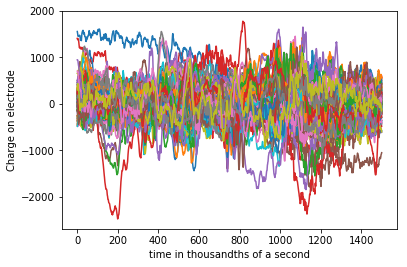

In [10]:
plt.plot(first_seconds)

plt.xlabel('time in thousandths of a second')
plt.ylabel('Charge on electrode')

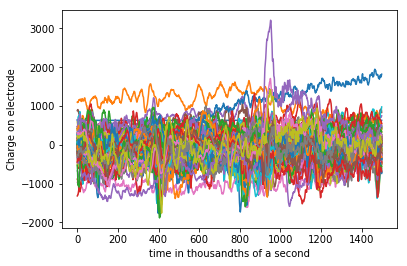

In [11]:
plt.plot(pre_anesthetics)

plt.xlabel('time in thousandths of a second')
plt.ylabel('Charge on electrode')

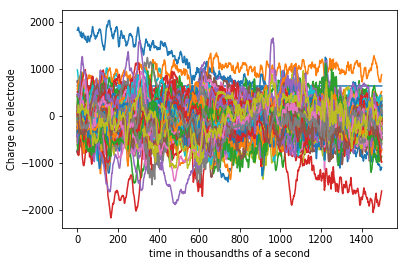

In [12]:
plt.plot(post_anesthetics)

plt.xlabel('time in thousandths of a second')
plt.ylabel('Charge on electrode')

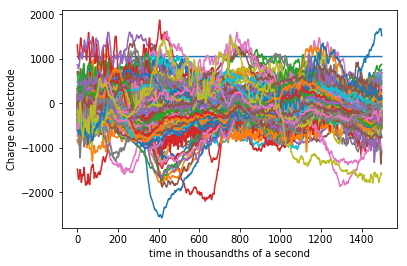

In [13]:
#plt.plot(last_seconds)

#plt.xlabel('time in thousandths of a second')
#plt.ylabel('Charge on electrode')

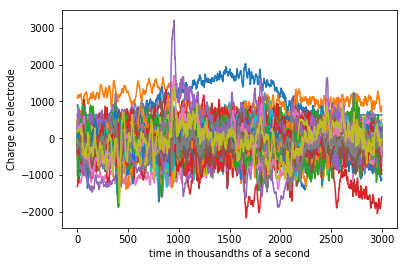

In [14]:
plt.plot(both_sides_of_sedation)

plt.xlabel('time in thousandths of a second')
plt.ylabel('Charge on electrode')
# All graphs prove it difficult to definitively compare all of the data at once

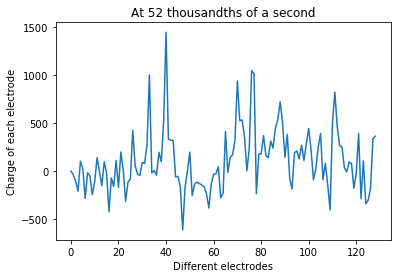

In [16]:
first_seconds.iloc[52].values

plt.plot(first_seconds.iloc[52].values)

plt.xlabel('Different electrodes')
plt.ylabel('Charge of each electrode')
plt.title('At 52 thousandths of a second')

# For 52 thousandths of a second, this is the charge that each electrode attaches to when coming up with the overall sum of the
# charges on the entire group of neurons. 

In [17]:
#https://docs.scipy.org/doc/scipy-0.18.1/reference/tutorial/fftpack.html#two-and-n-dimensional-discrete-fourier-transforms

# for loop that characrterizes each column of electrodes, and lists out the voltages that occur through time

for column in first_seconds:
    print(first_seconds[column])

0       0.000
1       0.001
2       0.002
3       0.003
4       0.004
5       0.005
6       0.006
7       0.007
8       0.008
9       0.009
10      0.010
11      0.011
12      0.012
13      0.013
14      0.014
15      0.015
16      0.016
17      0.017
18      0.018
19      0.019
20      0.020
21      0.021
22      0.022
23      0.023
24      0.024
25      0.025
26      0.026
27      0.027
28      0.028
29      0.029
        ...  
1471    1.471
1472    1.472
1473    1.473
1474    1.474
1475    1.475
1476    1.476
1477    1.477
1478    1.478
1479    1.479
1480    1.480
1481    1.481
1482    1.482
1483    1.483
1484    1.484
1485    1.485
1486    1.486
1487    1.487
1488    1.488
1489    1.489
1490    1.490
1491    1.491
1492    1.492
1493    1.493
1494    1.494
1495    1.495
1496    1.496
1497    1.497
1498    1.498
1499    1.499
1500    1.500
Name: ECoG_time, dtype: float64
0       192
1       205
2       230
3       242
4       286
5       314
6       361
7       389
8       405
9     

In [18]:
first_seconds.ix[1,:]
# This shows the electrode charges after 1 millisecond of the data. 

ECoG_time       0.001
ECoG_ch1      205.000
ECoG_ch2      -35.000
ECoG_ch3     -328.000
ECoG_ch4     -415.000
ECoG_ch5       -7.000
ECoG_ch6     -379.000
ECoG_ch7     -184.000
ECoG_ch8      125.000
ECoG_ch9      217.000
ECoG_ch10      49.000
ECoG_ch11     282.000
ECoG_ch12       2.000
ECoG_ch13     -34.000
ECoG_ch14     194.000
ECoG_ch15     -45.000
ECoG_ch16    -284.000
ECoG_ch17      33.000
ECoG_ch18    -167.000
ECoG_ch19      89.000
ECoG_ch20    -174.000
ECoG_ch21     253.000
ECoG_ch22     175.000
ECoG_ch23    -314.000
ECoG_ch24      27.000
ECoG_ch25     -24.000
ECoG_ch26     243.000
ECoG_ch27     170.000
ECoG_ch28     -56.000
ECoG_ch29    -316.000
               ...   
ECoG_ch99      24.000
ECoG_ch100    142.000
ECoG_ch101      6.000
ECoG_ch102    162.000
ECoG_ch103    153.000
ECoG_ch104    519.000
ECoG_ch105    262.000
ECoG_ch106    109.000
ECoG_ch107    278.000
ECoG_ch108     94.000
ECoG_ch109   -477.000
ECoG_ch110     44.000
ECoG_ch111    115.000
ECoG_ch112    145.000
ECoG_ch113

In [19]:
firstelectrode1 = first_seconds.ix[:,1]
# This calls for the first column of the data (rather the first electrode)

In [498]:
#plt.plot(firstelectrode1)

#plt.xlabel('Time in milliseconds')
#plt.ylabel('Voltage read by electrode')
#plt.title('Voltage read by electrode every millisecond for 1/128 electrodes at start of experiment')

In [497]:
#electrode1 for preanesthetics

#electrode1time2 = pre_anesthetics.ix[:,1]
#plt.plot(electrode1time2)
#plt.xlabel('Time in milliseconds')
#plt.ylabel('Voltage read by electrode')
#plt.title('Voltage read by electrode every millisecond for 1/128 electrodes right before sedation')

In [496]:
#electrode1time3 = post_anesthetics.ix[:,1]
# for after sedation in electrode 1
#plt.plot(electrode1time3)
#plt.xlabel('Time in milliseconds')
#plt.ylabel('Voltage read by electrode')
#plt.title('Voltage read by electrode every millisecond for 1/128 electrodes after sedation')

In [495]:
#electrode1time4 = last_seconds.ix[:,1] # For the end of the experiment
#plt.plot(fourthelectrode1)
#plt.xlabel('Time in milliseconds')
#plt.ylabel('Voltage read by electrode')
#plt.title('Voltage read by electrode every millisecond for 1/128 electrodes at end of experiment')

In [494]:
#both_side_sedation = both_sides_of_sedation.ix[:,1] # shows before and after sedation
#plt.plot(both_side_sedation)
#plt.xlabel('Time in milliseconds')
#plt.ylabel('Voltage read by electrode')
#plt.title('Voltage read by electrode every millisecond for 1/128 electrodes before and after sedation')

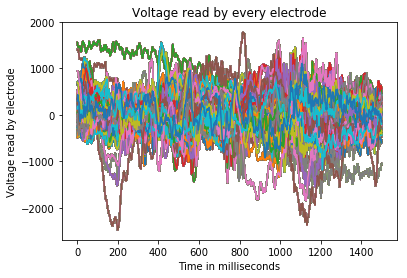

In [44]:
for column in first_seconds:
    # still very messy, let's FFT
    plt.plot(first_seconds)
    plt.xlabel('Time in milliseconds')
    plt.ylabel('Voltage read by electrode')
    plt.title('Voltage read by every electrode')

0      631.001
1      631.002
2      631.003
3      631.004
4      631.005
5      631.006
6      631.007
7      631.008
8      631.009
9      631.010
10     631.011
11     631.012
12     631.013
13     631.014
14     631.015
15     631.016
16     631.017
17     631.018
18     631.019
19     631.020
20     631.021
21     631.022
22     631.023
23     631.024
24     631.025
25     631.026
26     631.027
27     631.028
28     631.029
29     631.030
        ...   
970    631.971
971    631.972
972    631.973
973    631.974
974    631.975
975    631.976
976    631.977
977    631.978
978    631.979
979    631.980
980    631.981
981    631.982
982    631.983
983    631.984
984    631.985
985    631.986
986    631.987
987    631.988
988    631.989
989    631.990
990    631.991
991    631.992
992    631.993
993    631.994
994    631.995
995    631.996
996    631.997
997    631.998
998    631.999
999    632.000
Name: 631, dtype: float64
0     -497
1     -513
2     -564
3     -609
4     -608
5   

C:\Users\cberg\AnacondaNew\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0, 30)

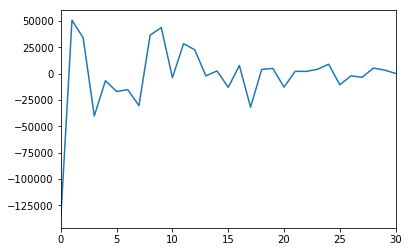

In [202]:
from scipy.fftpack import fft, ifft

for column in first_seconds:
    print(first_seconds[column])



first_seconds_fft = np.fft.fft(first_seconds[column])
freq = np.fft.fftfreq(first_seconds[column].size, 1/1000)
print(first_seconds_fft)

plt.plot(first_seconds_fft)
plt.xlim(0,30)

In [29]:
for_cooper = pd.read_excel("C:\\Users\\cberg\\Documents\\finalprojectbiol419\\for cooper.xlsx")
for_cooper

630.5   -109.0   -101.0    39.0     182.0   -324.0   -204.0   -157.0   \
0    630.501     -126      -97       22      152     -317     -176     -183   
1    630.502     -142      -89        2       53     -289     -162     -215   
2    630.503     -166      -89       -5      -35     -258     -187     -236   
3    630.504     -214      -65       10      -34     -246     -208     -271   
4    630.505     -288      -66       18       26     -221     -224     -307   
5    630.506     -393      -71       41       92     -194     -220     -360   
6    630.507     -484      -60       90       99     -157     -217     -401   
7    630.508     -546      -41      108       49     -179     -215     -424   
8    630.509     -581       -1      120       -5     -167     -191     -423   
9    630.510     -603       11      100      -66     -175     -206     -425   
10   630.511     -616       23       79     -116     -201     -230     -392   
11   630.512     -619       32       85     -129     -256     -270     -349   
12   630.513     -632       45      106     -140     -280     -310     -314   
13   630.514     -622       35      124      -71     -304     -324     -295   
14   630.515     -649       37      117        7     -302     -358     -309   
15   630.516     -664       65      110       12     -310     -342     -277   
16   630.517     -684       64      113       -7     -311     -335     -320   
17   630.518     -716       72      109     -103     -341     -353     -341   
18   630.519     -740       72       95     -144     -366     -352     -348   
19   630.520     -742      101       70     -126     -382     -316     -336   
20   630.521     -772      108       53     -118     -397     -347     -338   
21   630.522     -763      118       71     -108     -411     -365     -304   
22   630.523     -734      126      112     -102     -422     -360     -292   
23   630.524     -697      111      165      -79     -420     -351     -310   
24   630.525     -676      105      203      -20     -431     -376     -332   
25   630.526     -628       87      238        5     -419     -402     -352   
26   630.527     -584       81      221      -37     -420     -463     -366   
27   630.528     -539       82      191     -162     -415     -502     -375   
28   630.529     -497       89      182     -218     -433     -548     -385   
29   630.530     -439       96      219     -218     -422     -569     -387   
..       ...      ...      ...      ...      ...      ...      ...      ...   
970  631.471      138     -139     -257     -301     -258     -381      -70   
971  631.472       81     -127     -271     -269     -247     -338      -22   
972  631.473       19     -133     -279     -273     -203     -256       40   
973  631.474      -29     -132     -313     -292     -173     -227       62   
974  631.475      -65     -105     -326     -268     -161     -231       61   
975  631.476      -88      -59     -303     -224     -154     -244       61   
976  631.477      -87      -50     -285     -207     -139     -257       36   
977  631.478      -99      -38     -292     -169     -150     -234       16   
978  631.479      -99      -40     -297     -123     -174     -196      -16   
979  631.480      -81      -55     -281     -127     -202     -198      -96   
980  631.481      -48      -59     -270     -144     -193     -216     -188   
981  631.482      -65      -66     -290     -184     -180     -255     -263   
982  631.483      -75      -62     -284     -190     -172     -343     -339   
983  631.484      -93      -55     -262     -213     -178     -427     -416   
984  631.485      -91      -53     -245     -253     -173     -443     -496   
985  631.486      -81      -55     -243     -268     -154     -463     -560   
986  631.487      -70      -51     -274     -275     -136     -469     -579   
987  631.488      -50      -37     -346     -224     -111     -448     -530   
988  631.489      -29      -15     -382     -204      -9

In [30]:
cooper_first_electrode = for_cooper.ix[:,1]

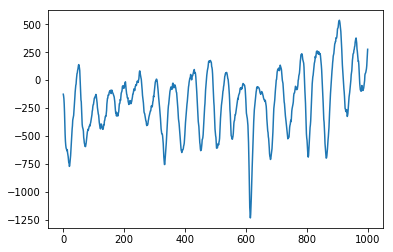

In [31]:
plt.plot(cooper_first_electrode)

In [493]:
c = np.fft.fft(cooper_first_electrode)
freq = np.fft.fftfreq(cooper_first_electrode.size, 1/1000)

(0, 80)

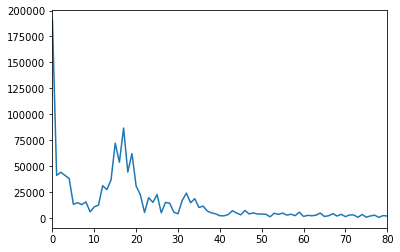

In [33]:
plt.plot(np.abs(c))
plt.xlim(0,80)

In [34]:
# This test modified our course of action into just looking at the data 1000 points at a time, and FFT each time point.
# so we should separate the data into 1000 millisecond increments...and then work from there

# ********Everything below marks the beginning of our publication that will later appear on our paper**************

In [57]:
first_electrode_start = for_cooper.ix[:,1]
print(first_electrode_start)

0     -126
1     -142
2     -166
3     -214
4     -288
5     -393
6     -484
7     -546
8     -581
9     -603
10    -616
11    -619
12    -632
13    -622
14    -649
15    -664
16    -684
17    -716
18    -740
19    -742
20    -772
21    -763
22    -734
23    -697
24    -676
25    -628
26    -584
27    -539
28    -497
29    -439
      ... 
970    138
971     81
972     19
973    -29
974    -65
975    -88
976    -87
977    -99
978    -99
979    -81
980    -48
981    -65
982    -75
983    -93
984    -91
985    -81
986    -70
987    -50
988    -29
989     -5
990     46
991     58
992     63
993     71
994     85
995    101
996    128
997    183
998    233
999    276
Name: -109, dtype: int64


C:\Users\cberg\AnacondaNew\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


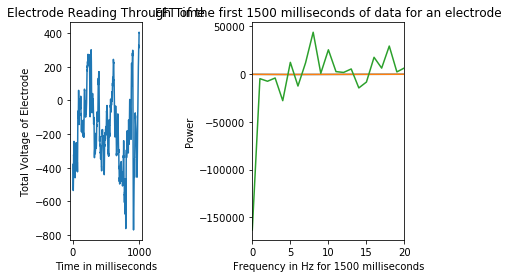

In [492]:
def start_electrode(x):
    plt.plot(first_seconds.ix[:,x])
    return first_seconds.ix[:,x]

plt.figure()
plt.subplot(1,4,1)
plt.plot(first_seconds.ix[:,100])
plt.xlabel('Time in milliseconds')
plt.ylabel('Total Voltage of Electrode')
plt.title('Electrode Reading Through Time')

plt.subplot(1,2,2)
aa = np.fft.fft(start_electrode(100))
freq = np.fft.fftfreq(start_electrode(100).size, 1/1000)
plt.plot(aa)
plt.xlim(0,20)
plt.xlabel('Frequency in Hz for 1500 milliseconds')
plt.ylabel('Power')
plt.title('FFT of the first 1500 milliseconds of data for an electrode')
#define a function that returns the values of the electrode and the charges associated with the neuronal cells contacting the
#electrode.

In [132]:
start_seconds = pd.read_excel("C:\\Users\\cberg\\Documents\\finalprojectbiol419\\1secondstartexperiment.xlsx")
start_seconds

ECoG_time  ECoG_ch1  ECoG_ch2  ECoG_ch3  ECoG_ch4  ECoG_ch5  ECoG_ch6  \
0         0.000       192         4      -364      -454         1      -366   
1         0.001       205       -35      -328      -415        -7      -379   
2         0.002       230       -73      -346      -385       -22      -368   
3         0.003       242       -97      -332      -348       -59      -359   
4         0.004       286       -75      -321      -337       -94      -342   
5         0.005       314       -74      -338      -374      -110      -315   
6         0.006       361       -51      -376      -370      -138      -297   
7         0.007       389       -68      -374      -357      -166      -277   
8         0.008       405       -61      -344      -341      -184      -239   
9         0.009       426       -67      -275      -300      -184      -187   
10        0.010       445       -97      -256      -283      -160       -97   
11        0.011       477      -106      -236      -270      -129       -83   
12        0.012       486      -102      -233      -276      -107       -84   
13        0.013       492      -118      -244      -270       -88       -49   
14        0.014       495      -174      -189      -222       -92       -18   
15        0.015       483      -246      -153      -184       -98       -38   
16        0.016       457      -246      -150      -136       -84       -20   
17        0.017       427      -236      -183      -118       -77       -20   
18        0.018       400      -217      -225      -131       -88       -51   
19        0.019       368      -205      -250      -131       -93      -104   
20        0.020       344      -198      -224       -76      -104      -171   
21        0.021       329      -186      -205       -18       -98      -206   
22        0.022       315      -167      -168        52       -95      -210   
23        0.023       289      -174      -150       110       -95      -236   
24        0.024       253      -200      -196       162      -126      -231   
25        0.025       221      -229      -238       190      -144      -206   
26        0.026       182      -223      -230       222      -159      -151   
27        0.027       147      -208      -234       240      -160      -144   
28        0.028        99      -185      -187       268      -172      -139   
29        0.029        49      -159      -125       288      -184      -114   
...         ...       ...       ...       ...       ...       ...       ...   
971       0.971       415        22       215       289      -297      -227   
972       0.972       412        31       245       317      -302      -175   
973       0.973       375         6       267       346      -306      -219   
974       0.974       364        -4       266       355      -285      -229   
975       0.975       354        -8       293       360      -277      -229   
976       0.976       334       -22       325       334      -240      -245   
977       0.977       306         3       365       318      -227      -253   
978       0.978       265        28       397       307      -242      -290   
979       0.979       228        45       406       263      -280      -330   
980       0.980       183        56       370       203      -266      -305   
981       0.981       141        61       335       158      -283      -313   
982       0.982       116        75       297       158      -335      -313   
983       0.983        93        94       297       137      -352      -319   
984       0.984       106        98       313       129      -394      -275   
985       0.985       116       137       318        94      -402      -255   
986       0.986       107       145       295        30      -411      -268   
987       0.987       124       186       288        -6      -408      -239   
988       0.988       121       212       255       -48      -438      -224   
989       0.989       116       226       243       -67 

In [133]:
before_seconds = pd.read_excel("C:\\Users\\cberg\\Documents\\finalprojectbiol419\\1secondbeforesedation.xlsx")
before_seconds

630   91  91.1  141  -21  -243  -192   20  396  -241  ...    75  339  \
0    630.001   90    80  146   -8  -230  -173   45  363  -219  ...    86  361   
1    630.002   69    67  149   12  -207  -160   66  322  -178  ...   101  348   
2    630.003   54    44  106   -9  -201  -177   68  271  -153  ...   112  340   
3    630.004   36    27   55    1  -184  -150   71  213  -154  ...   112  352   
4    630.005   31     5   17   23  -214  -136   41  169  -123  ...   128  367   
5    630.006   33     5   12   62  -230  -115   -3  113   -85  ...   130  352   
6    630.007   28   -11  -16   28  -269  -108  -51  129   -55  ...   151  309   
7    630.008   39    -2  -37   -6  -264  -102  -72  126   -16  ...   167  246   
8    630.009   30    -1  -45  -29  -254   -89  -84  113   -18  ...   172  195   
9    630.010   49    19  -63  -19  -232   -43 -138   80   -37  ...   165  168   
10   630.011   60    39  -73  -64  -203    -9 -165   74   -70  ...   165  173   
11   630.012   71    67  -65  -77  -166     2 -154   57   -73  ...   165  183   
12   630.013   76    70  -51  -81  -156   -13 -131   18  -110  ...   165  201   
13   630.014   46    60  -55 -102  -159   -63 -123  -65  -133  ...   169  216   
14   630.015   42    55  -53  -85  -153   -57 -123 -133  -131  ...   160  202   
15   630.016   26    57  -24  -61  -154   -87  -94  -99  -117  ...   153  159   
16   630.017    0    40   37  -54  -175   -81  -58  -43  -108  ...   156  157   
17   630.018  -17    38   53 -110  -198  -121  -30  -53  -120  ...   147  169   
18   630.019  -18    25   75 -124  -248  -156   -9  -60  -116  ...   139  202   
19   630.020  -38    31  110 -105  -276  -193    1  -11  -118  ...   149  229   
20   630.021  -65    25  127  -96  -334  -214   -3   24  -110  ...   162  250   
21   630.022  -77    32  159  -99  -395  -209   -9   60  -109  ...   180  214   
22   630.023  -81    44  176 -113  -436  -197  -39   51   -93  ...   200  193   
23   630.024  -91    51  192 -122  -464  -174  -92   58   -88  ...   197  204   
24   630.025 -106    46  211  -82  -467  -141 -135   37   -80  ...   176  173   
25   630.026 -105    48  214  -10  -439  -127 -174   15   -93  ...   176  158   
26   630.027 -109    36  189    9  -384  -101 -175   10   -75  ...   169  134   
27   630.028 -116    21  166    2  -362  -101 -158   60   -74  ...   159  137   
28   630.029  -95    24  169   14  -323  -109 -104  101   -61  ...   160  122   
29   630.030  -97    11  170   10  -292  -105  -61  127   -68  ...   131   60   
..       ...  ...   ...  ...  ...   ...   ...  ...  ...   ...  ...   ...  ...   
970  630.971    8   -74 -354 -301  -337  -323 -329 -574    -4  ...  -169  -12   
971  630.972   45   -57 -320 -329  -339  -306 -312 -563    21  ...  -122   23   
972  630.973   67   -33 -307 -353  -327  -258 -272 -600    76  ...   -72   29   
973  630.974   88   -37 -312 -331  -284  -284 -235 -633   115  ...    -9   70   
974  630.975  102   -40 -293 -284  -262  -313 -189 -635   141  ...    22   42   
975  630.976  115   -64 -302 -267  -243  -336 -183 -629   162  ...    62   26   
976  630.977  137   -93 -335 -222  -207  -344 -188 -622   166  ...    83    4   
977  630.978  166  -118 -351 -182  -169  -293 -173 -596   185  ...   113  -25   
978  630.979  159  -155 -307 -153  -162  -280 -174 -566   206  ...   146  -62   
979  630.980  173  -192 -258 -113  -148  -273 -162 -503   234  ...   153 -177   
980  630.981  161  -225 -234  -60  -141  -273 -172 -471   237  ...   154 -289   
981  630.982  166  -231 -225  -55  -160  -290 -202 -411   227  ...   144 -354   
982  630.983  169  -227 -226  -52  -148  -286 -219 -410   195  ...   130 -338   
983  630.984  176  -227 -219  -22  -150  -260 -264 -404   145  ...   113 -296   
984  630.985  167  -218 -205  -36  -148  -265 -278 -403    98  ...   100 -227   
985  630.986  164  -203 -150  -65  -128  -229 -271 -409    41  ...    95 -129   
986  630.987  156  -190 -136 -133  -127  -266 -279 -407   -34  ...    89 -102   
987  630.988  121  -188 -101 -201  -144 

In [157]:
after_seconds = pd.read_excel("C:\\Users\\cberg\\Documents\\finalprojectbiol419\\1secaftersedation.xlsx")
after_seconds

631  -469  -36   -107  -194  -238  -446   14   -558  -615  ...   \
0    631.001  -497   -33  -120  -197  -241  -423    44  -538  -595  ...    
1    631.002  -513   -14  -129  -201  -233  -417    66  -471  -543  ...    
2    631.003  -564     4  -171  -213  -225  -433    90  -430  -488  ...    
3    631.004  -609    26  -188  -245  -239  -469   104  -409  -409  ...    
4    631.005  -608    40  -201  -270  -239  -487   141  -340  -324  ...    
5    631.006  -606    27  -241  -258  -250  -498   159  -313  -239  ...    
6    631.007  -606    20  -272  -255  -266  -485   175  -306  -162  ...    
7    631.008  -585    37  -274  -255  -272  -466   184  -311   -80  ...    
8    631.009  -568    59  -256  -292  -286  -447   220  -325   -17  ...    
9    631.010  -570    71  -244  -380  -266  -414   232  -318    62  ...    
10   631.011  -578    57  -236  -436  -268  -350   254  -308   100  ...    
11   631.012  -555    51  -192  -491  -263  -305   269  -284   145  ...    
12   631.013  -544    40  -172  -515  -251  -288   254  -241   189  ...    
13   631.014  -521    20  -209  -526  -223  -279   200  -197   222  ...    
14   631.015  -459    31  -230  -497  -164  -226   162  -159   259  ...    
15   631.016  -394    27  -229  -440  -123  -172    86  -131   289  ...    
16   631.017  -342    38  -211  -436  -111  -159    -6   -76   333  ...    
17   631.018  -299    29  -181  -459  -107  -141   -68    -7   370  ...    
18   631.019  -258    21  -159  -492  -110  -105  -122    27   401  ...    
19   631.020  -226    23  -136  -453  -124   -48  -135    52   412  ...    
20   631.021  -206     9  -107  -386  -131   -23  -163    83   381  ...    
21   631.022  -181     4   -91  -345  -128   -11  -187    12   338  ...    
22   631.023  -160     2   -95  -292  -124    25  -254   -71   288  ...    
23   631.024  -131    20  -114  -279   -83    50  -260  -114   269  ...    
24   631.025   -99    27  -135  -276   -82    62  -294  -212   240  ...    
25   631.026   -90    16  -167  -304   -57    63  -278  -306   198  ...    
26   631.027   -59    36  -185  -301   -28    61  -260  -323   164  ...    
27   631.028   -46    52  -217  -299   -18    80  -267  -364   125  ...    
28   631.029   -24    83  -238  -276   -41    84  -290  -379    91  ...    
29   631.030     5   102  -253  -263   -84    89  -264  -416    64  ...    
..       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    
970  631.971   357   -46  -309  -400  -385  -275  -373  -724    50  ...    
971  631.972   346   -44  -289  -407  -355  -270  -354  -642    51  ...    
972  631.973   344   -41  -267  -406  -335  -271  -322  -569    59  ...    
973  631.974   343   -42  -262  -387  -326  -277  -291  -550    90  ...    
974  631.975   348   -31  -276  -353  -304  -289  -272  -546    94  ...    
975  631.976   346   -17  -305  -366  -293  -256  -235  -578   115  ...    
976  631.977   343    -5  -315  -370  -314  -269  -203  -671   134  ...    
977  631.978   324    -8  -309  -339  -347  -283  -199  -729   142  ...    
978  631.979   326   -19  -307  -305  -380  -296  -186  -750   153  ...    
979  631.980   352   -21  -283  -281  -395  -313  -156  -777   150  ...    
980  631.981   369   -27  -278  -252  -394  -295  -142  -781   125  ...    
981  631.982   364   -40  -239  -228  -387  -288  -112  -817    76  ...    
982  631.983   383   -42  -216  -193  -376  -257   -76  -819    40  ...    
983  631.984   383   -34  -176  -147  -377  -241   -91  -835     4  ...    
984  631.985   383   -38  -161  -117  -367  -239  -101  -850   -44  ...    
985  631.986   432   -29  -168   -61  -335  -268   -94  -811   -92  ...    
986  631.987   427   -10  -175     6  -318  -249   -88  -783  -141  ...    
987  631.988   418     5  -204    30  -322  -267  -133  -721  -153  ...    
988  631.989   399    10  -243    49  -311  -283  -194  -657  -167  ...    
989  631.990   391    15  -254    61  -322  -277  -234  -658  -186  ...    
990  631.991   392    31  -231    98  -316  -253  -232  -

In [135]:
final_seconds = pd.read_excel("C:\\Users\\cberg\\Documents\\finalprojectbiol419\\1secondendexperiment.xlsx")
final_seconds

1047.574   192.000   -35.000     338.000   -224.000    515.000   \
0     1047.575        181        -30        319       -222        511   
1     1047.576        168        -45        321       -229        508   
2     1047.577        159        -49        322       -227        479   
3     1047.578        156        -65        322       -233        475   
4     1047.579        149        -78        291       -227        467   
5     1047.580        153        -91        264       -221        466   
6     1047.581        152        -89        241       -233        468   
7     1047.582        155        -97        212       -241        475   
8     1047.583        149       -100        182       -235        460   
9     1047.584        142       -100        176       -236        465   
10    1047.585        135       -103        191       -232        471   
11    1047.586        135       -108        197       -232        492   
12    1047.587        124       -109        203       -232        499   
13    1047.588         98       -114        200       -227        506   
14    1047.589         71       -121        195       -233        528   
15    1047.590         45       -118        203       -229        527   
16    1047.591         10       -126        195       -248        514   
17    1047.592         13       -130        185       -237        532   
18    1047.593         19       -134        188       -216        530   
19    1047.594         27       -136        182       -213        541   
20    1047.595         42       -138        189       -177        555   
21    1047.596         39       -147        175       -186        534   
22    1047.597         52       -151        169       -185        508   
23    1047.598         67       -144        176       -182        504   
24    1047.599         72       -137        164       -183        462   
25    1047.600         65       -128        166       -172        465   
26    1047.601         82       -132        167       -161        480   
27    1047.602         72       -127        193       -170        466   
28    1047.603         76       -129        190       -164        470   
29    1047.604         52       -125        155       -170        442   
..         ...        ...        ...        ...        ...        ...   
970   1048.545       -518       -228       -739        -26       -123   
971   1048.546       -507       -216       -707        -35       -112   
972   1048.547       -500       -212       -697        -57       -109   
973   1048.548       -492       -202       -650        -72       -105   
974   1048.549       -506       -224       -634       -107       -121   
975   1048.550       -520       -231       -631       -135       -132   
976   1048.551       -526       -243       -658       -173       -158   
977   1048.552       -528       -263       -635       -213       -182   
978   1048.553       -534       -260       -628       -225       -191   
979   1048.554       -538       -257       -638       -221       -181   
980   1048.555       -529       -248       -655       -214       -183   
981   1048.556       -534       -227       -722       -207       -162   
982   1048.557       -523       -212       -807       -184       -143   
983   1048.558       -514       -205       -863       -147       -117   
984   1048.559       -510       -216       -907       -124       -100   
985   1048.560       -506       -210       -887        -92        -71   
986   1048.561       -513       -222       -830        -45        -47   
987   1048.562       -520       -224       -762        -23        -49   
988   1048.563       -503       -199       -701         22        -55   
989   1048.564       -508       -198       -638         42        -66   
990   1048.565       -513       -194       -580         54        -71   
991   1048.566       -512       -197       -533         48        -71   
992   1048.567       -506       -190       -515         40      

C:\Users\cberg\AnacondaNew\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


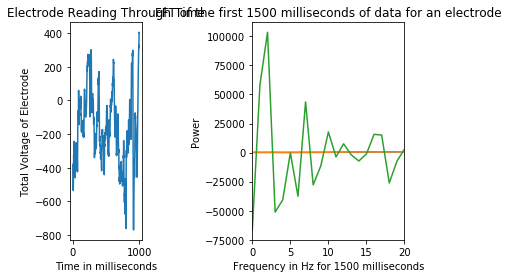

In [483]:
def start_electrode(x):
    plt.plot(start_seconds.ix[:,x])
    return start_seconds.ix[:,x]

plt.figure()
plt.subplot(1,4,1)
plt.plot(first_seconds.ix[:,100])
plt.xlabel('Time in milliseconds')
plt.ylabel('Total Voltage of Electrode')
plt.title('Electrode Reading Through Time')

plt.subplot(1,2,2)
aa = np.fft.fft(start_electrode(100))
freq = np.fft.fftfreq(start_electrode(100).size, 1/1000)
plt.plot(aa)
plt.xlim(0,20)
plt.xlabel('Frequency in Hz for 1500 milliseconds')
plt.ylabel('Power')
plt.title('FFT of the first 1500 milliseconds of data for an electrode')
#define a function that returns the values of the electrode and the charges associated with the neuronal cells contacting the
#electrode.

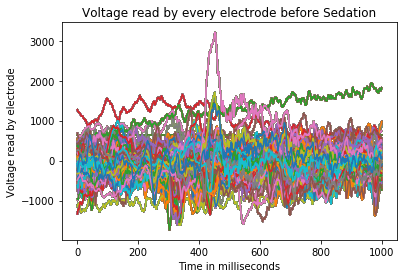

In [488]:
for column in before_seconds:
    # still very messy, let's FFT
    plt.plot(before_seconds)
    plt.xlabel('Time in milliseconds')
    plt.ylabel('Voltage read by electrode')
    plt.title('Voltage read by every electrode before Sedation')

In [137]:
def pre_electrode(x):
    plt.plot(before_seconds.ix[:,x])
    return before_seconds.ix[:,x]

C:\Users\cberg\AnacondaNew\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


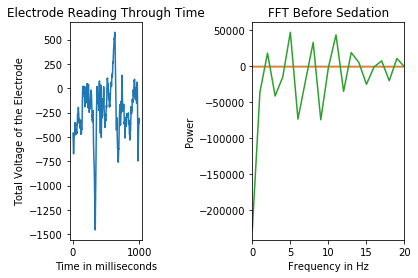

In [489]:
plt.figure()
plt.subplot(1,4,1)
plt.plot(before_seconds.ix[:,100])
plt.xlabel('Time in milliseconds')
plt.ylabel('Total Voltage of the Electrode')
plt.title('Electrode Reading Through Time')

plt.subplot(1,2,2)
bb = np.fft.fft(pre_electrode(100))
freq = np.fft.fftfreq(pre_electrode(100).size, 1/1000)
plt.plot(bb)
plt.xlim(0,20)
plt.xlabel('Frequency in Hz')
plt.ylabel('Power')
plt.title('FFT Before Sedation')

In [268]:
peak = 0
for i in bb:
    if i > peak:
        peak = i

        

        

In [269]:
peak

(47398.124012873188+7244.9658058361056j)

In [156]:
def post_electrode(x):
    plt.plot(after_seconds.ix[:,x])
    return after_seconds.ix[:,x]

C:\Users\cberg\AnacondaNew\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


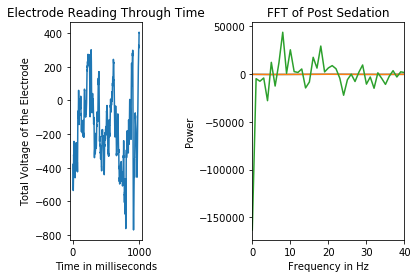

In [274]:
plt.figure()
plt.subplot(1,4,1)
plt.plot(after_seconds.ix[:,100])
plt.xlabel('Time in milliseconds')
plt.ylabel('Total Voltage of the Electrode')
plt.title('Electrode Reading Through Time')

plt.subplot(1,2,2)
cc = np.fft.fft(post_electrode(100))
freq = np.fft.fftfreq(post_electrode(100).size, 1/1000)
plt.plot(cc)
plt.xlim(0,40)
plt.xlabel('Frequency in Hz')
plt.ylabel('Power')
plt.title('FFT of Post Sedation')

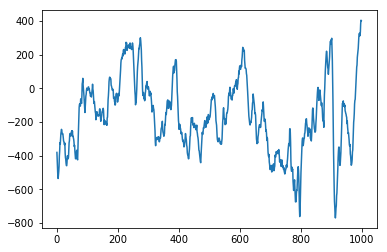

In [485]:
curr_transformation = np.fft.fft(post_electrode(100))

def get_freq_peak(transformation):
    peak = 0
    curr_place = 0
    place = curr_place
    for i in transformation[0:100]:
        if i > peak:
            peak = i
            place = curr_place

        curr_place += 1
        
    ret = [peak, place]
    return ret


In [299]:
def electrode_data(x, seconds):
    return seconds.ix[:,x]

# this code makes it easier to input in each of our subsets in the data, and return the column we want

In [473]:
electrode_frequencies = []
for i in range(128):
    curr_transformation = np.fft.fft(electrode_data(i, after_seconds)) #transform our input electrode data
    values = get_freq_peak(curr_transformation) #get the frequency of our transformation
    electrode_frequencies.append(values[1]) # add to our array
    # creates a list of electrode frequencies for each of the 128 electrodes

In [474]:
electrode_frequencies
# for each electrode from column1-column128 = channel1-channel128

[0,
 15,
 1,
 5,
 1,
 5,
 1,
 12,
 2,
 13,
 16,
 5,
 23,
 1,
 3,
 3,
 0,
 12,
 0,
 15,
 4,
 1,
 1,
 8,
 6,
 0,
 21,
 3,
 5,
 6,
 4,
 16,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 18,
 0,
 0,
 5,
 0,
 5,
 5,
 3,
 5,
 5,
 1,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 9,
 1,
 2,
 5,
 1,
 2,
 2,
 2,
 1,
 4,
 4,
 3,
 3,
 6,
 5,
 2,
 2,
 2,
 2,
 2,
 2,
 10,
 8,
 18,
 3,
 6,
 4,
 1,
 1,
 2,
 2,
 2,
 2,
 7,
 16,
 8,
 8,
 3,
 3,
 7,
 1,
 1,
 2,
 2,
 1,
 1,
 3,
 3,
 4,
 4,
 1,
 1,
 4,
 4,
 1,
 2,
 2,
 3,
 2,
 1,
 2,
 1,
 1]

In [475]:
delta = []
theta = []
alpha = []
beta = []


for i in electrode_frequencies:
    if i < 4:
        delta.append(i)
    elif 4 <= i < 8:
        theta.append(i)
    elif 8 <= i < 12:
        alpha.append(i)
    elif 12 <= i < 30:
        beta.append(i)


In [476]:
delta_electrodes = []
theta_electrodes = []
alpha_electrodes = []
beta_electrodes = []

curr = 0
for i in electrode_frequencies:
    if i < 4:
        delta_electrodes.append(curr)
    elif 4 <= i < 8:
        theta_electrodes.append(curr)
    elif 8 <= i < 12:
        alpha_electrodes.append(curr)
    elif 12 <= i < 30:
        beta_electrodes.append(curr)
    curr+=1

    # This code helps us append our list in order to list which electrodes classify as our brain wave types

In [477]:
alpha_electrodes

[23, 65, 86, 87, 100, 101]

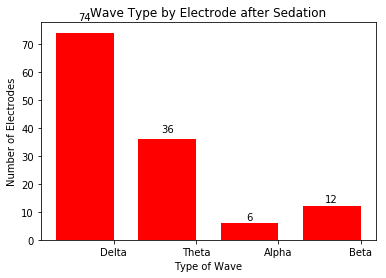

In [490]:
N = 4
waves = (len(delta), len(theta), len(alpha), len(beta))

ind = np.arange(N)  # x bars
width = 0.70       # width

fig, ax = plt.subplots()
rects1 = ax.bar(ind, waves, width, color='r')



ax.set_xlabel('Type of Wave')
ax.set_ylabel('Number of Electrodes')
ax.set_title('Wave Type by Electrode after Sedation')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Delta', 'Theta', 'Alpha', 'Beta'))




autolabel(rects1)

plt.show()

#http://matplotlib.org/examples/api/barchart_demo.html
# This site was helpful in organizing the bars into certian wave types in the histogram, based on our previous histogram
# displaying wave frequencies

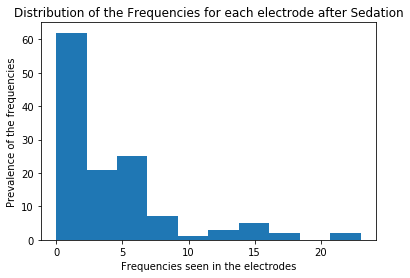

In [491]:
plt.hist(electrode_frequencies)
plt.xlabel('Frequencies seen in the electrodes')
plt.ylabel('Prevalence of the frequencies')
plt.title('Distribution of the Frequencies for each electrode after Sedation')

In [499]:
frequencies = [len(delta),len(theta),len(alpha), len(beta)]
frequencies

[74, 36, 6, 12]

In [181]:
def end_experiment(x):
    plt.plot(final_seconds.ix[:,x])
    return final_seconds.ix[:,x]

C:\Users\cberg\AnacondaNew\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


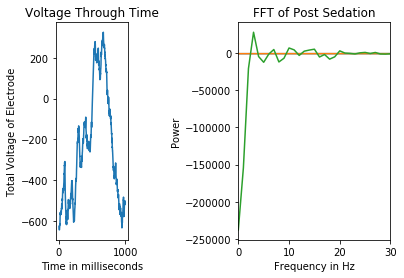

In [487]:
plt.figure()
plt.subplot(1,4,1)
plt.plot(final_seconds.ix[:,100])
plt.xlabel('Time in milliseconds')
plt.ylabel('Total Voltage of Electrode')
plt.title('Voltage Through Time')

plt.subplot(1,2,2)
dd = np.fft.fft(end_experiment(100))
freq = np.fft.fftfreq(end_experiment(100).size, 1/1000)
plt.plot(dd)
plt.xlim(0,30)
plt.xlabel('Frequency in Hz')
plt.ylabel('Power')
plt.title('FFT of Post Sedation')